In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load data, check base features

In [2]:
from perovskite_data_analysis.common.storage import GoogleDriveStorage
from perovskite_data_analysis.common.credentials import google_credentials

storage = GoogleDriveStorage(google_credentials())
df = storage.download_dataframe("perovskite/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df = df.rename(columns={"Perovskite_band_gap": "band_gap"})
df

,band_gap,tolerance_factor,A_1,A_2,A_3,A_4,A_5,A_1_coef,A_2_coef,A_3_coef,...,C_2_coef,C_3_coef,r_A,r_B,r_C,dimensionality_indicator,hydrophobicity,space_group,octahedral_factor,charge_balance
0,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
1,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
2,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
3,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4,1.59,0.968626,Cs,FA,MA,0,0,0.05,0.788,0.162,...,2.49,0,2.42868,1.190,2.1592,0,0,Pm3m,0.551130,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,1.38,0.815892,Cs,0,0,0,0,1.00,0.000,0.000,...,0.00,0,1.67000,1.154,2.2000,0,0,I4/mcm,0.524545,0.0
4965,1.63,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4966,1.63,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4967,1.51,0.972261,Cs,FA,0,0,0,0.08,0.920,0.000,...,0.00,0,2.46120,1.190,2.2000,0,0,Pm3m,0.540909,0.0


In [3]:
# check for na, dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   band_gap                  4969 non-null   float64
 1   tolerance_factor          4969 non-null   float64
 2   A_1                       4969 non-null   object 
 3   A_2                       4969 non-null   object 
 4   A_3                       4969 non-null   object 
 5   A_4                       4969 non-null   object 
 6   A_5                       4969 non-null   int64  
 7   A_1_coef                  4969 non-null   float64
 8   A_2_coef                  4969 non-null   float64
 9   A_3_coef                  4969 non-null   float64
 10  A_4_coef                  4969 non-null   float64
 11  A_5_coef                  4969 non-null   int64  
 12  B_1                       4969 non-null   object 
 13  B_2                       4969 non-null   object 
 14  B_3     

In [4]:
# check for perovskite count in A, B, C
def count_ions(df: pd.DataFrame, site_prefix: str) -> pd.Series:
    site_cols = [col for col in df.columns if col.startswith(site_prefix) and "coef" not in col]
    # Stack all columns into a single series and exclude -1
    all_ions = df[site_cols].stack().reset_index(drop=True)
    all_ions = all_ions[all_ions != "0"]
    all_ions = all_ions[all_ions != 0]
    print(all_ions)
    return all_ions.value_counts()


def plot_counts(ion_counts: pd.Series, site: str) -> None:
    plt.figure(figsize=(21, 10))
    ion_counts.plot(kind='bar', color='skyblue')
    plt.title(f'{site}-Site Ions', fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel('Ion')
    plt.ylabel('Count')
    plt.show()


# Get counts for A, B, and C sites
a_ion_counts = count_ions(df, 'A_')
b_ion_counts = count_ions(df, 'B_')
c_ion_counts = count_ions(df, 'C_')

0        MA
5        MA
10       MA
15       MA
20       Cs
         ..
24830    MA
24835    Cs
24836    FA
24840    Cs
24841    FA
Length: 5945, dtype: object
0        Pb
3        Pb
6        Pb
9        Pb
12       Pb
         ..
14893    Sn
14895    Pb
14898    Pb
14901    Pb
14904    Pb
Length: 5030, dtype: object
0         I
3         I
6         I
9         I
12       Br
         ..
14892     I
14895     I
14898     I
14901     I
14904     I
Length: 5592, dtype: object


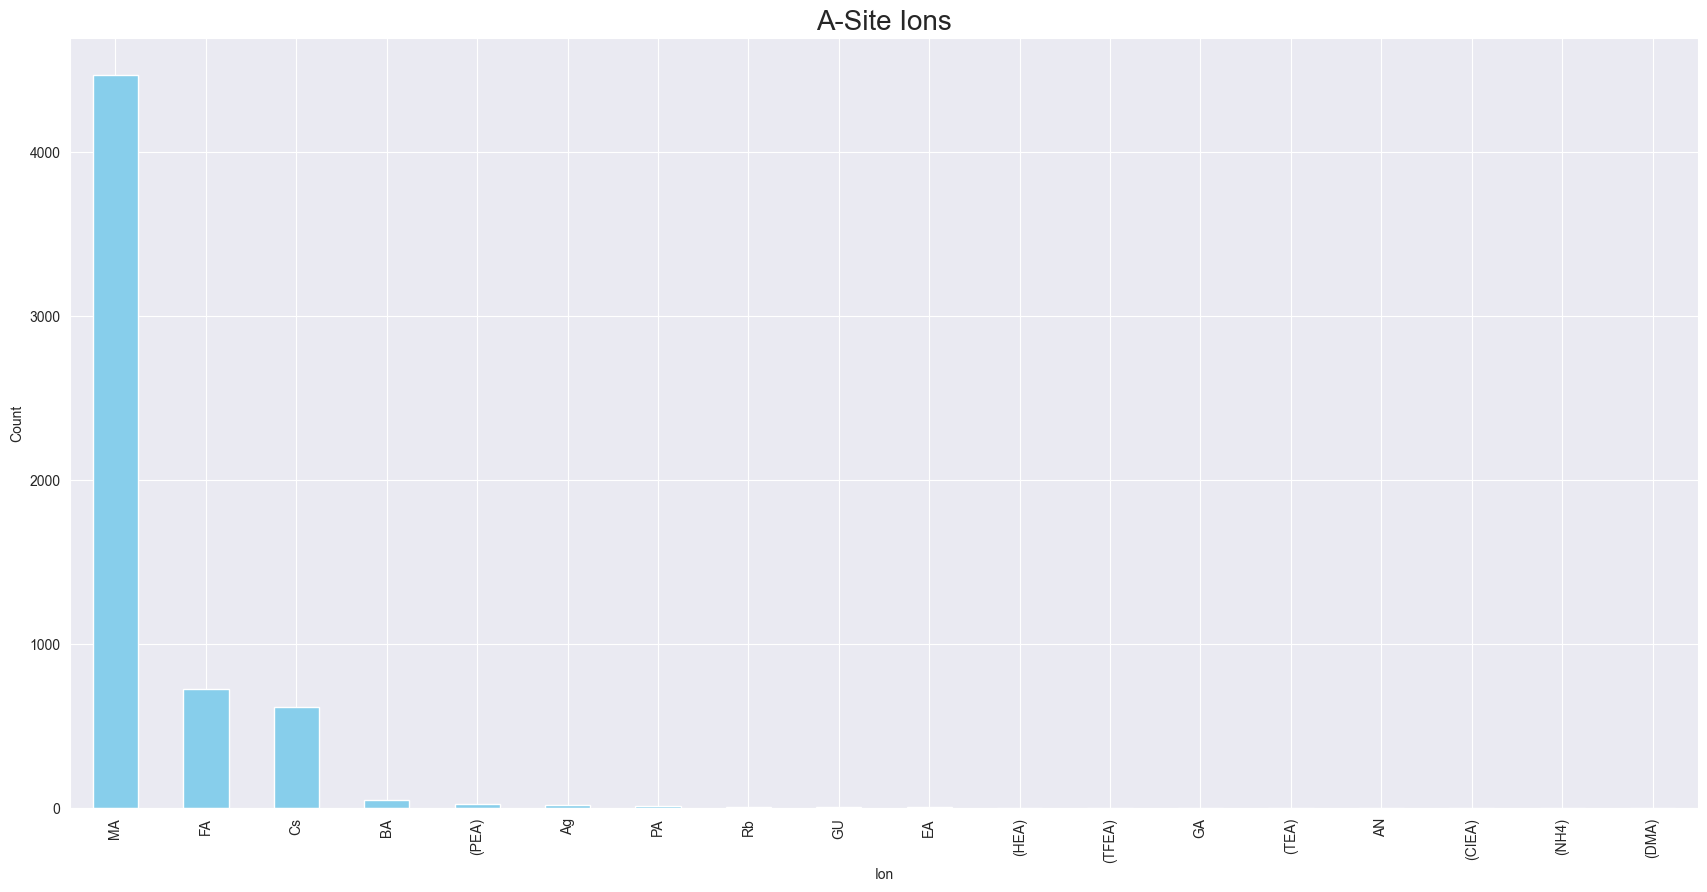

In [5]:
plot_counts(a_ion_counts, 'A')

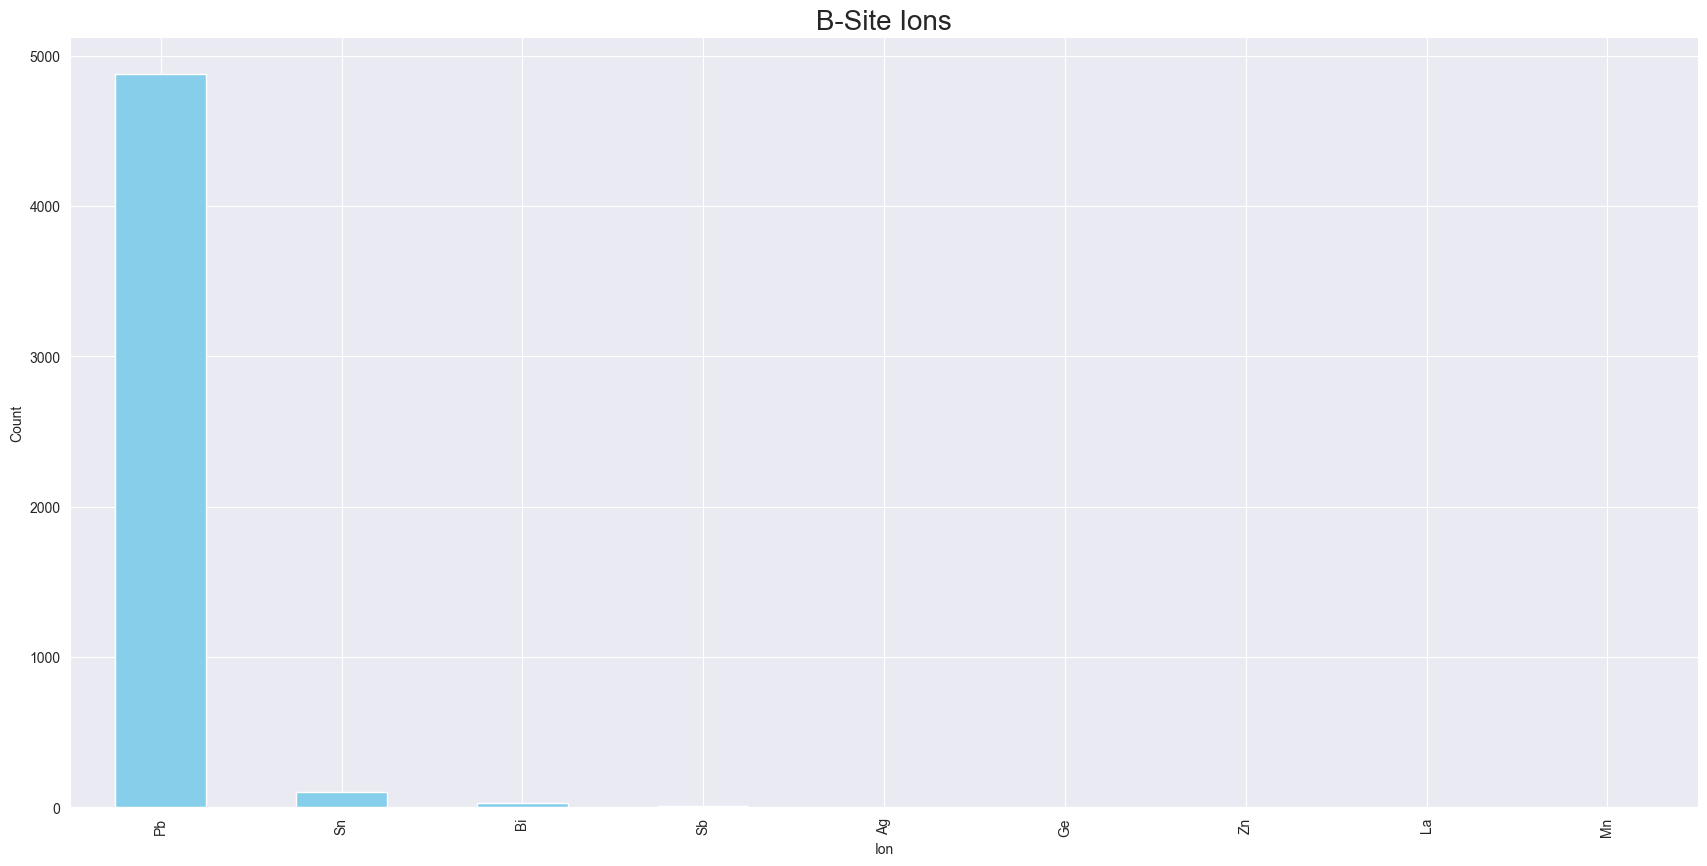

In [6]:
plot_counts(b_ion_counts, 'B')

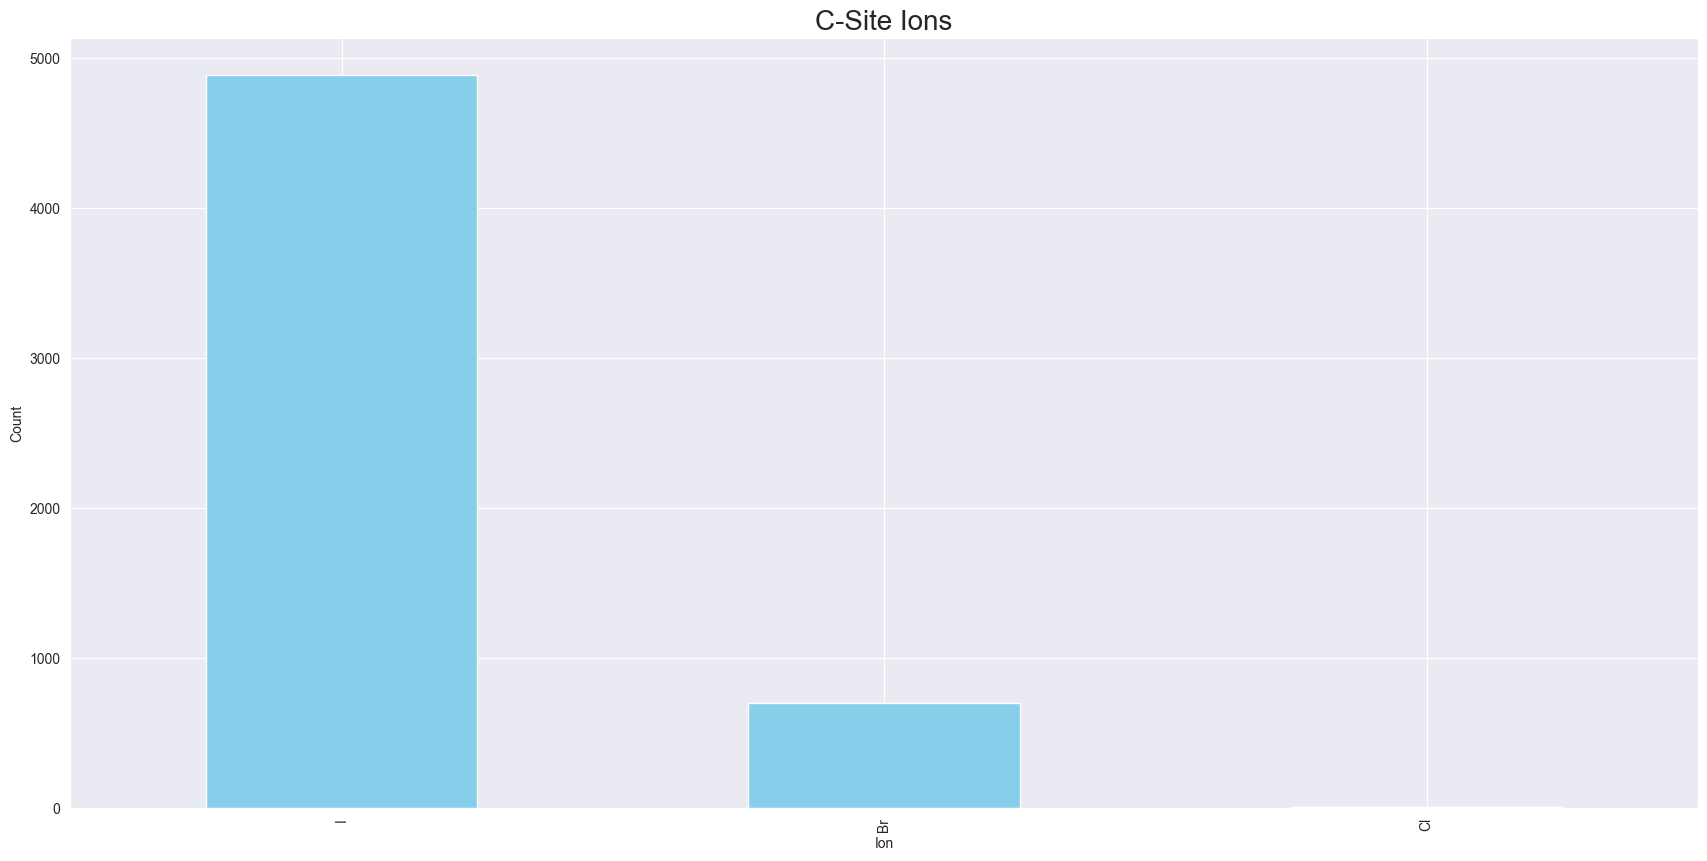

In [7]:
plot_counts(c_ion_counts, 'C')

### Correlation

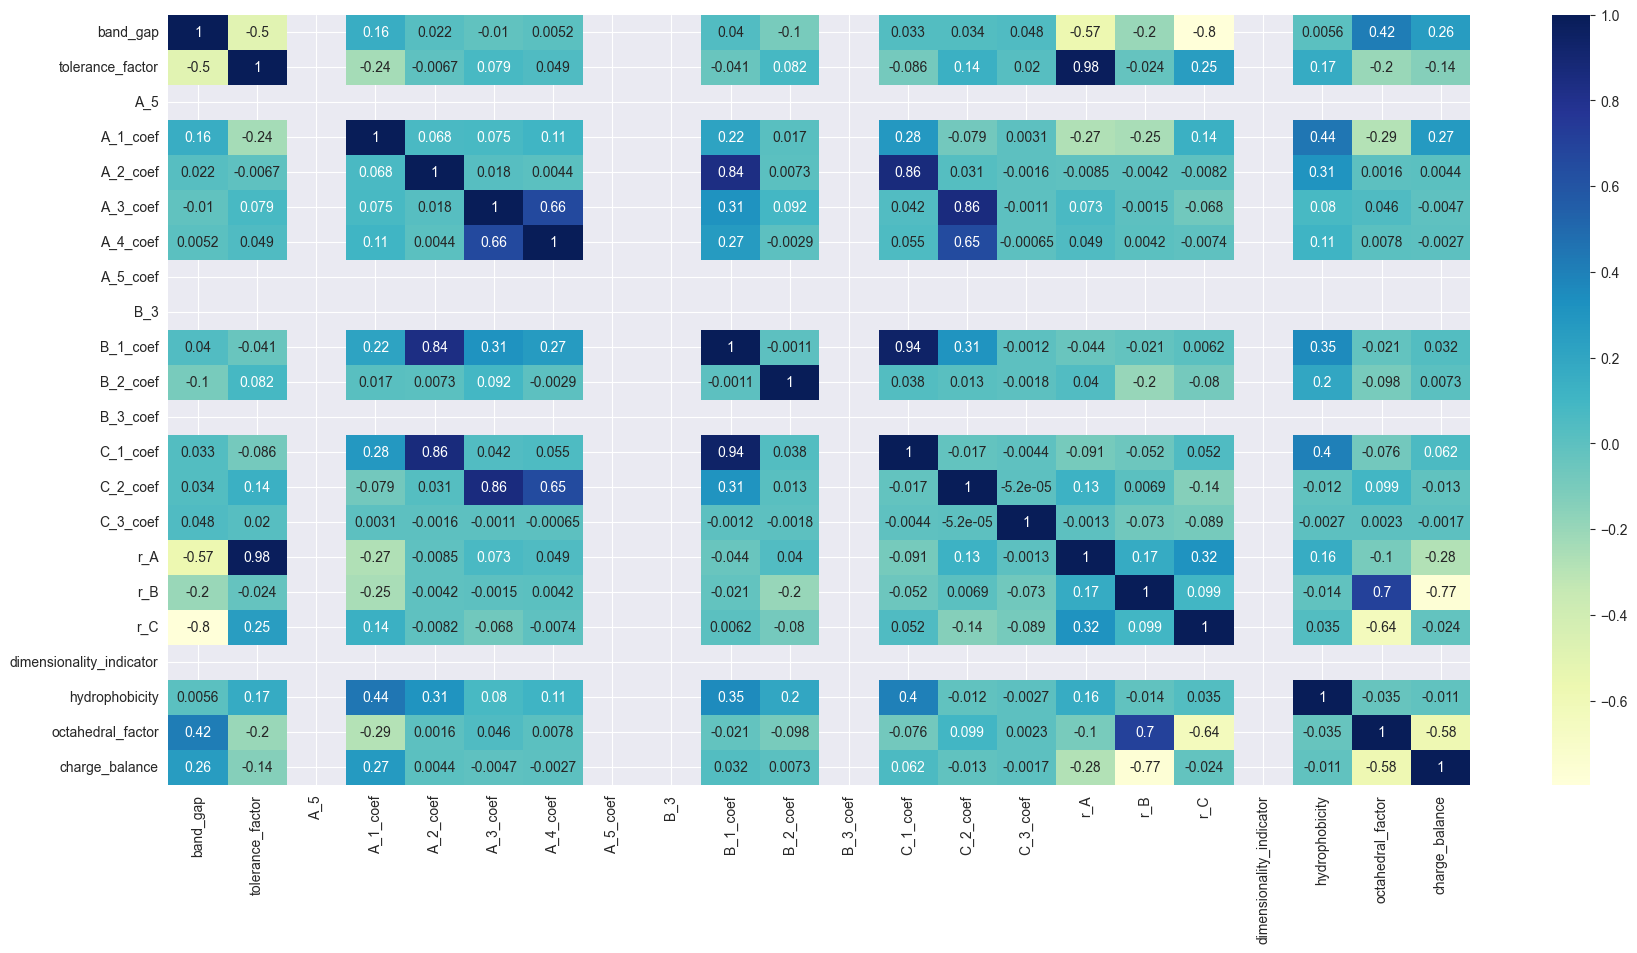

In [8]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
plt.figure(figsize=(21, 10))
sns.heatmap(df[num_df_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
band_gap_corr = df[num_df_cols].corr()["band_gap"].drop("band_gap").dropna()
band_gap_corr

tolerance_factor    -0.501093
A_1_coef             0.155324
A_2_coef             0.022099
A_3_coef            -0.010389
A_4_coef             0.005214
B_1_coef             0.039796
B_2_coef            -0.101025
C_1_coef             0.033137
C_2_coef             0.033888
C_3_coef             0.048221
r_A                 -0.567401
r_B                 -0.202196
r_C                 -0.795964
hydrophobicity       0.005603
octahedral_factor    0.416892
charge_balance       0.258491
Name: band_gap, dtype: float64

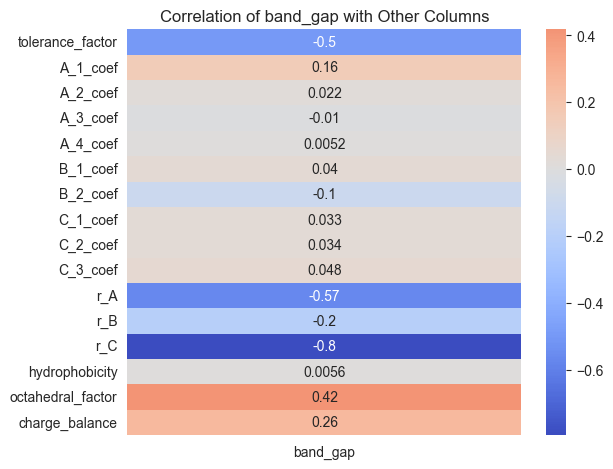

In [10]:
sns.heatmap(band_gap_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of band_gap with Other Columns')
plt.tight_layout()
plt.show()

### Check distributions - normalize if need

In [11]:
# check skew
skew_series = df[num_df_cols].drop("band_gap", axis=1).skew()
skew_series

tolerance_factor            -0.891099
A_5                          0.000000
A_1_coef                     0.299864
A_2_coef                    30.678510
A_3_coef                    30.655746
A_4_coef                    36.535001
A_5_coef                     0.000000
B_3                          0.000000
B_1_coef                    29.966985
B_2_coef                    15.721808
B_3_coef                     0.000000
C_1_coef                    32.580898
C_2_coef                    30.672557
C_3_coef                    49.829704
r_A                         -1.441284
r_B                        -12.158296
r_C                         -5.128175
dimensionality_indicator     0.000000
hydrophobicity               7.359719
octahedral_factor           -4.028154
charge_balance              12.030413
dtype: float64

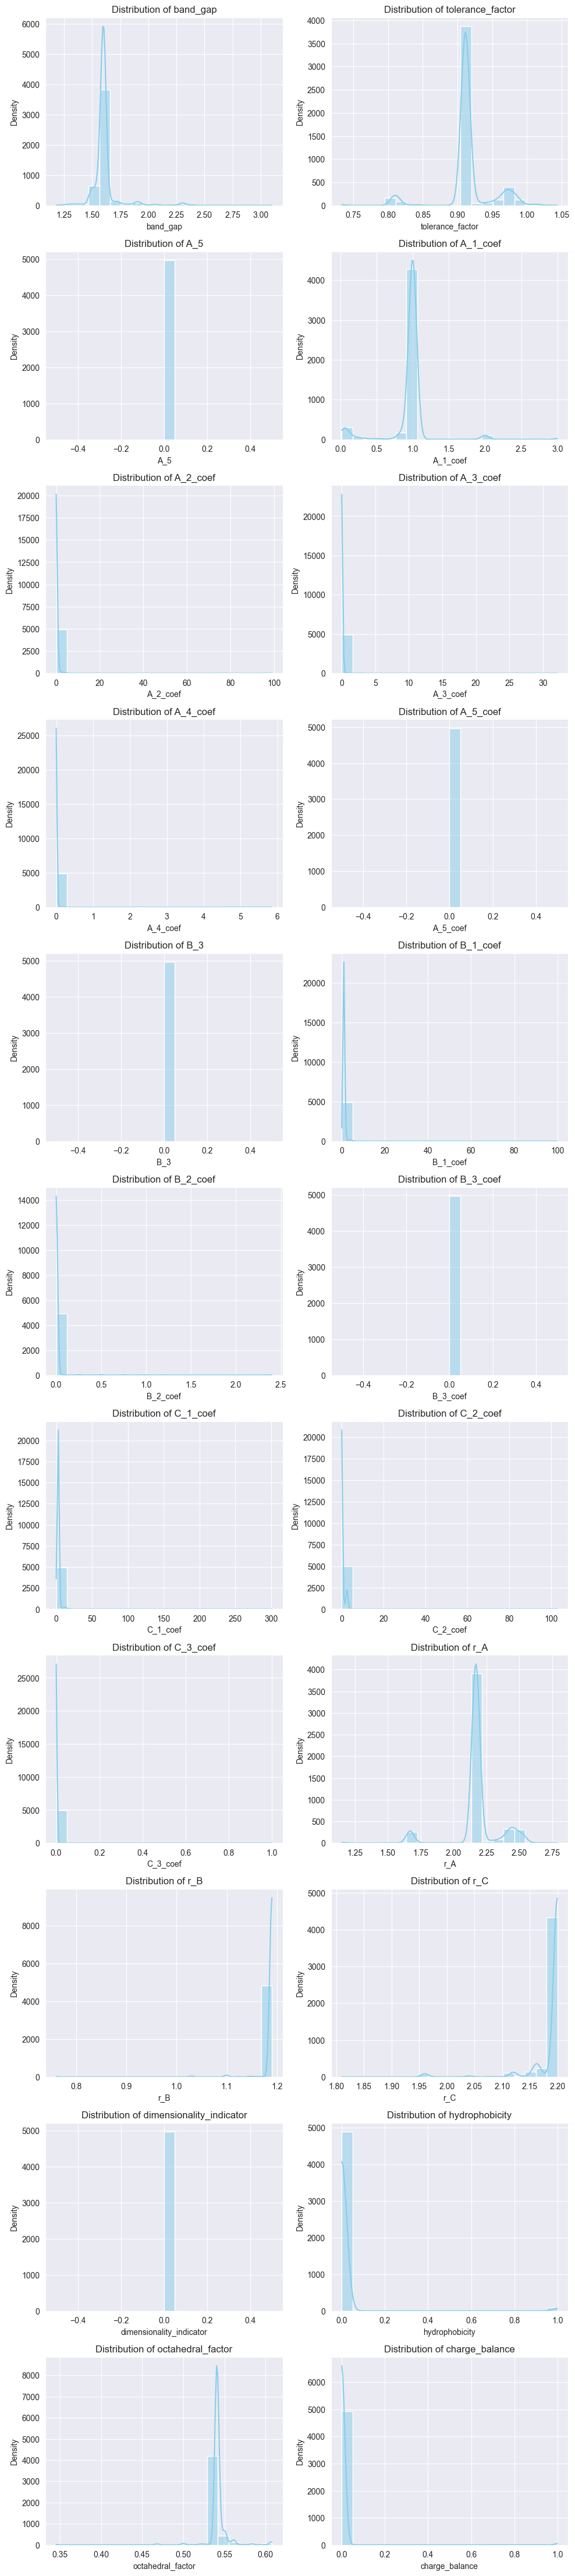

In [12]:
# plots
num_df = df[num_df_cols]

n_cols = 2
n_features = df.shape[1]
n_rows = (n_features + n_cols - 1) // n_cols

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False)

# Flatten axes array for easier indexing (handles 1D or 2D cases)
axes = axes.flatten() if n_features > 1 else [axes]

# Plot distribution for each column
for i, column in enumerate(num_df.columns):
    sns.histplot(num_df[column], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# drop unnecessary features
df.drop(columns=["dimensionality_indicator", "hydrophobicity", "charge_balance"], inplace=True)

### Model building preprocess

In [15]:
from perovskite_data_analysis.entities.elements import Elements

def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "0":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Elements.get_element_by_name(ion)
    return element.code

In [16]:
ion_cols = ["A_1", "A_2", "A_3", "A_4", "A_5", "B_1", "B_2", "B_3", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df[col] = df[col].apply(encode_ion).astype(int)

In [17]:
# encode space groups
from perovskite_data_analysis.entities.space_group import SpaceGroup
df["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)
df

,band_gap,tolerance_factor,A_1,A_2,A_3,A_4,A_5,A_1_coef,A_2_coef,A_3_coef,...,C_2,C_3,C_1_coef,C_2_coef,C_3_coef,r_A,r_B,r_C,space_group,octahedral_factor
0,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
1,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
2,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
3,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
4,1.59,0.968626,3,2,1,0,0,0.05,0.788,0.162,...,48,0,0.51,2.49,0,2.42868,1.190,2.1592,2,0.551130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,1.38,0.815892,3,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,1.67000,1.154,2.2000,3,0.524545
4965,1.63,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
4966,1.63,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.190,2.2000,2,0.540909
4967,1.51,0.972261,3,2,0,0,0,0.08,0.920,0.000,...,0,0,3.00,0.00,0,2.46120,1.190,2.2000,2,0.540909


### Train test split

In [28]:
X, y = df.drop(columns=["band_gap"]), df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build model

In [ ]:
# find the best hyperparameters
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000],
    "max_depth": [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
    "objective": ["reg:squarederror"]
}
grid_search = GridSearchCV(
    estimator=XGBRFRegressor(), param_grid=param_grid, cv=5, n_jobs=-1,
)
grid_search.fit(X_train, y_train)